В лабораторной работе проверялся закон Стефана-Больцмана $R =\sigma T^n$.
Потребляемая лампой накаливания мощность (следовательно, и излучаемая мощность $P = RS$) измерялась амперметром и вольтметром, а температура
нити- оптическим пирометром.
Излучающая площадь нитей накаливания равна $1 см^2$.

При разных токах получено следующее:
|$t, ^{\circ}C$|700|900|1100|1300|1500|1700|1900|
|:-----:|:-:|:-:|:-:|:-:|:--:|:--:|:--:|
|$P, Вт$|11|23|47|61|82|120|170|

С помощью интерполяции найти мощность при $t = 800^{\circ}C, 1000^{\circ}C$

Значение мощности при t = 800°C: P = 10.564 Вт
Значение мощности при t = 1000°C: P = 36.588 Вт
Значение мощности при t = 800°C: P = 10.564 Вт
Значение мощности при t = 1000°C: P = 36.588 Вт


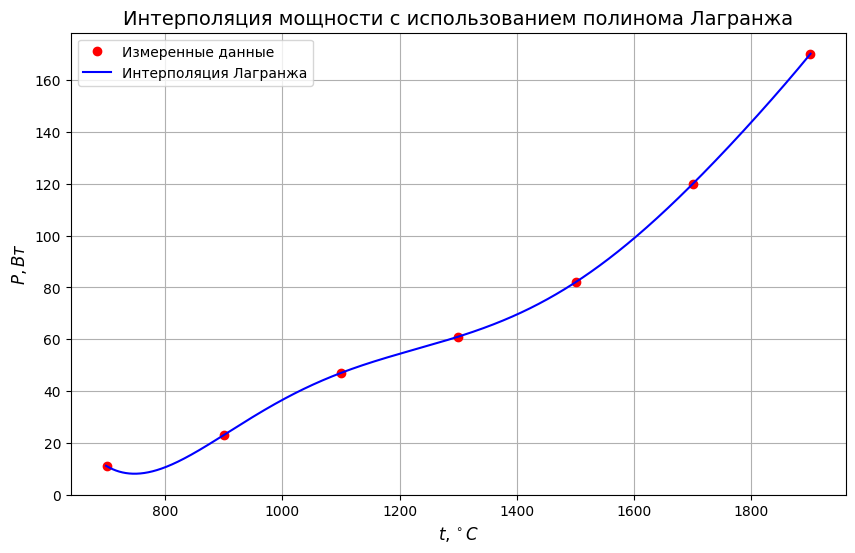

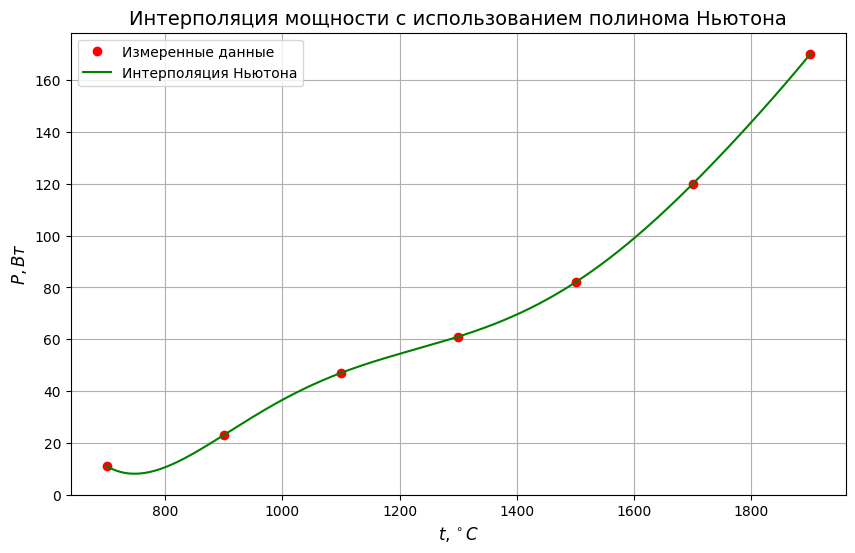

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod


class InterpolationMethod(ABC):
    @abstractmethod
    def interpolate(self, t: float) -> float:
        pass


class LagrangeInterpolation(InterpolationMethod):
    def __init__(self, t_vals, P_vals):
        self.t_vals = t_vals
        self.P_vals = P_vals

    def basis_polynomial(self, t, i):
        termL = 1
        for j in range(len(self.t_vals)):
            if i != j:
                termL *= (t - self.t_vals[j]) / (self.t_vals[i] - self.t_vals[j])
        return termL

    def interpolate(self, t):
        return sum(self.P_vals[i] * self.basis_polynomial(t, i) for i in range(len(self.t_vals)))

class NewtonInterpolation(InterpolationMethod):
    def __init__(self, t_vals, P_vals):
        self.t_vals = t_vals
        self.P_vals = P_vals
        self.divided_differences = self.compute_divided_differences()
        

    def compute_divided_differences(self):
        n = len(self.t_vals)
        diffs = [list(self.P_vals)]
        for j in range(1, n):
            row = []
            for i in range(n - j):
                diff = (diffs[j-1][i+1] - diffs[j-1][i]) / (self.t_vals[i+j] - self.t_vals[i])
                row.append(diff)
            diffs.append(row)
        return diffs

    def partial_summ(self, t, i):
        termN = 1
        for j in range(i):
            termN *= (t - self.t_vals[j])
        return termN
    
    def interpolate(self, t):
        result = self.P_vals[0]
        for i in range(1, len(self.t_vals)):
            result += self.divided_differences[i][0] * self.partial_summ(t, i)
        return result


# Данные
t_vals = [700, 900, 1100, 1300, 1500, 1700, 1900]
P_vals = [11, 23, 47, 61, 82, 120, 170]
t_val_800 = 800  # Значение температуры для интерполяции
t_val_1000 = 1000  # Значение температуры для интерполяции

#Метод Лагранжа
interpolator = LagrangeInterpolation(t_vals, P_vals)
P_800 = interpolator.interpolate(t_val_800)
P_1000 = interpolator.interpolate(t_val_1000)
print(f'Значение мощности при t = {t_val_800}°C: P = {P_800:.3f} Вт')
print(f'Значение мощности при t = {t_val_1000}°C: P = {P_1000:.3f} Вт')

#Метод Ньютона
interpolator1 = NewtonInterpolation(t_vals, P_vals)
P_800_N = interpolator1.interpolate(t_val_800)
P_1000_N = interpolator1.interpolate(t_val_1000)
print(f'Значение мощности при t = {t_val_800}°C: P = {P_800_N:.3f} Вт')
print(f'Значение мощности при t = {t_val_1000}°C: P = {P_1000_N:.3f} Вт')

#Построение Графиков
t_plot = np.linspace(699, 1901, 3000)
P_plot = [interpolator.interpolate(t) for t in t_plot]
P_plot1 = [interpolator1.interpolate(t) for t in t_plot]


#График для Лагранжа
plt.figure(figsize=(10, 6))
plt.plot(t_vals, P_vals, 'o', label='Измеренные данные', color='red')# Измеренные данные
plt.plot(t_plot, P_plot, label='Интерполяция Лагранжа', color='blue')  # Интерполяция Лагранжа
plt.xlabel(r'$t, ^\circ C$', fontsize=12)
plt.ylabel(r'$P, Вт$', fontsize=12)
plt.title('Интерполяция мощности с использованием полинома Лагранжа', fontsize=14)
plt.grid()
plt.legend()
plt.show()

#График для Ньютона
plt.figure(figsize=(10,6))
plt.plot(t_vals, P_vals, 'o', label='Измеренные данные', color='red')# Измеренные данные
plt.plot(t_plot, P_plot1, label='Интерполяция Ньютона', color='green')  # Интерполяция Ньютона
plt.xlabel(r'$t, ^\circ C$', fontsize=12)
plt.ylabel(r'$P, Вт$', fontsize=12)
plt.title('Интерполяция мощности с использованием полинома Ньютона', fontsize=14)
plt.grid()
plt.legend()
plt.show()




In [5]:
import dis

def normal_func(x):
    return x * 2

lambda_func = lambda x: x * 2

print(dis.dis(normal_func))
print(dis.dis(lambda_func))

  3           0 RESUME                   0

  4           2 LOAD_FAST                0 (x)
              4 LOAD_CONST               1 (2)
              6 BINARY_OP                5 (*)
             10 RETURN_VALUE
None
  6           0 RESUME                   0
              2 LOAD_FAST                0 (x)
              4 LOAD_CONST               1 (2)
              6 BINARY_OP                5 (*)
             10 RETURN_VALUE
None


In [3]:
def myfunc(n):
  return lambda a : a ** n

mydoubler = myfunc(2)

print(mydoubler(11))

121
